In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas contextily

In [ ]:
import pandas as pd
import geopandas as gdp 
import contextily as ctx
import matplotlib.pyplot as plt

In [ ]:
parchi_regionali = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon.zip")

In [ ]:
comuni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Com01012022_g")

In [ ]:
quartieri_milano = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

1. visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)

In [ ]:
parchi_regionali3857 = parchi_regionali.to_crs(3857)
comuni3857 = comuni.to_crs(3857)
quartieri3857 = quartieri_milano.to_crs(3857)

In [ ]:
milano = comuni3857[comuni3857["COMUNE"] == "Milano"].geometry.item()

In [ ]:
parchi_milano = parchi_regionali3857[parchi_regionali3857.intersects(milano)].geometry.unary_union

In [ ]:
comuni_parchi_milano = comuni3857[comuni3857.intersects(parchi_milano)]

In [ ]:
parchi_milano2 = gdp.GeoSeries([parchi_milano])

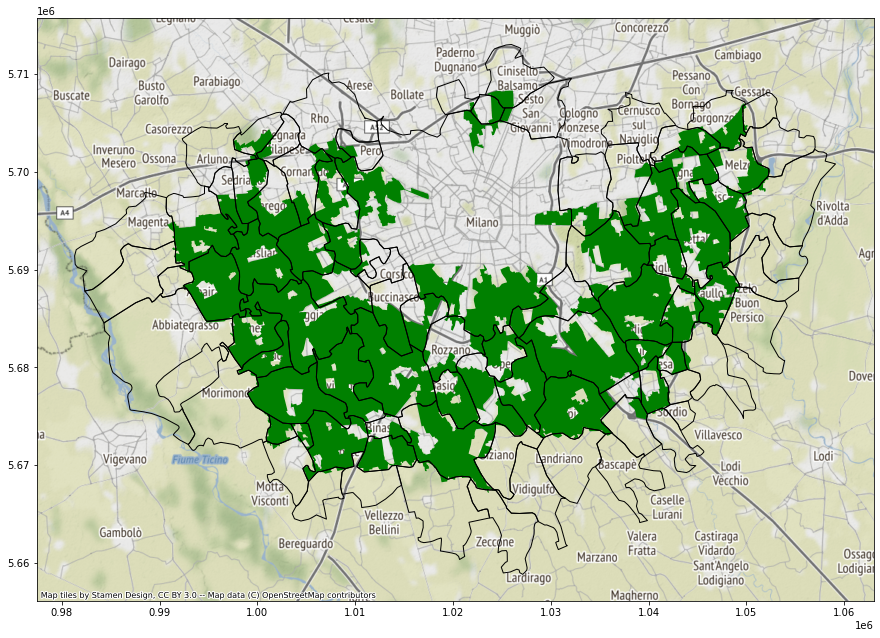

In [ ]:
ax = parchi_milano2.plot(figsize = (15, 12), edgecolor = "none", facecolor = "green")
comuni_parchi_milano.plot(ax = ax, edgecolor= "k", facecolor = "none")
ctx.add_basemap(ax)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

In [ ]:
quartieri_milano_parco = quartieri3857[quartieri3857.intersects(parchi_milano)]

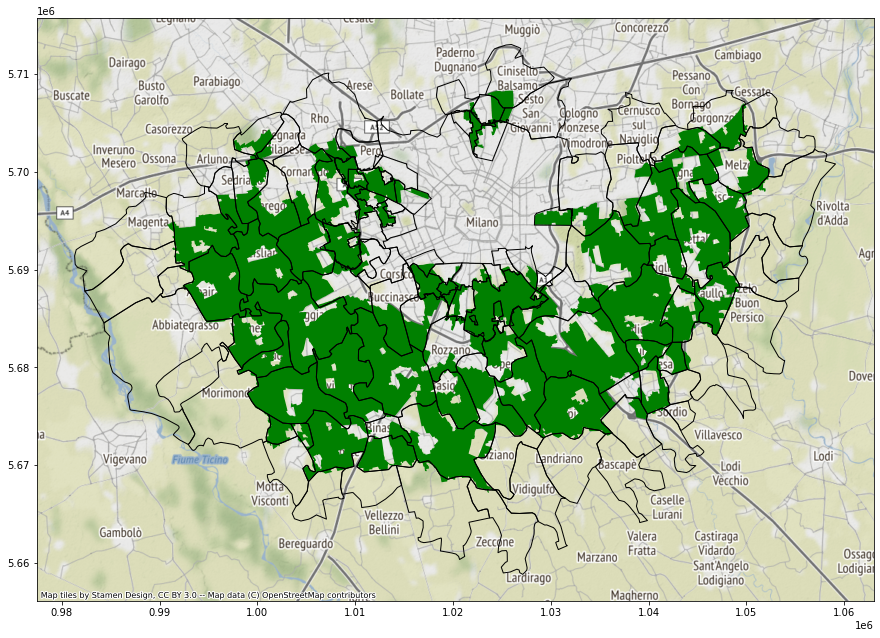

In [ ]:
ax = parchi_milano2.plot(figsize = (15, 12), edgecolor = "none", facecolor = "green")
comuni_parchi_milano.plot(ax = ax, edgecolor= "k", facecolor = "none")
quartieri_milano_parco.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

3.  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

In [ ]:
parchi_regionali3857

inserire un nome di un parco: Parco Adamello


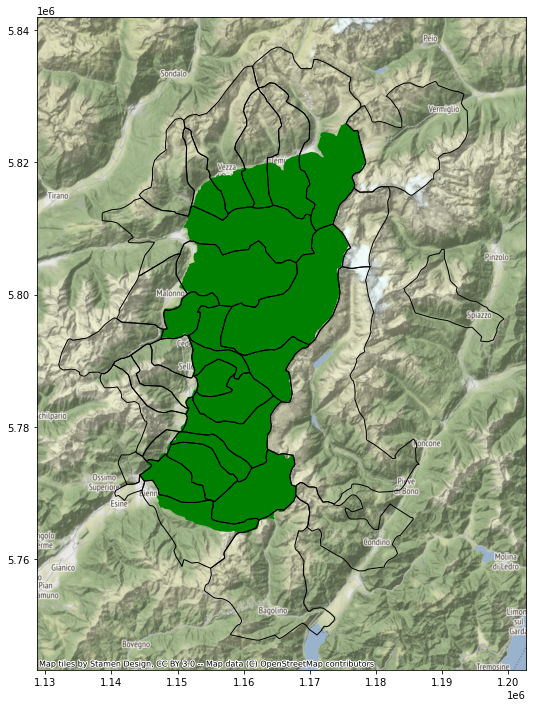

In [ ]:
nome_parco = input("inserire un nome di un parco: ")
parco_selezionato = parchi_regionali3857[parchi_regionali3857["NOME"] == nome_parco].geometry.item()
comuni_parco_selezionato = comuni3857[comuni3857.intersects(parco_selezionato)]
parco_selezionato2 = gdp.GeoSeries([parco_selezionato])
ax = parco_selezionato2.plot(figsize = (15, 12), edgecolor = "none", facecolor = "green")
comuni_parco_selezionato.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

In [ ]:
province = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ProvCM01012022_g")

In [ ]:
province3857 = province.to_crs(3857)

inserire un nome di un parco: Parco Adamello


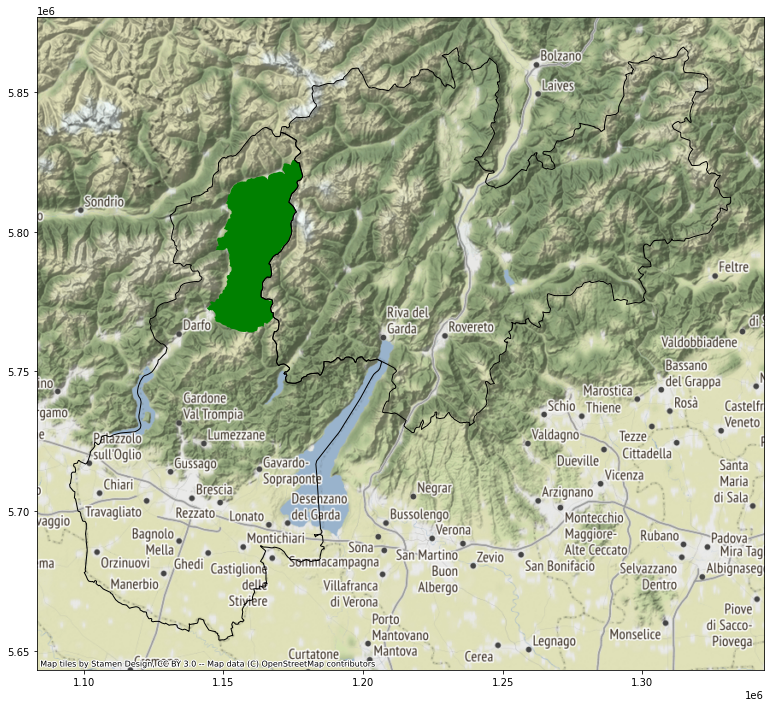

In [ ]:
nome_parco = input("inserire un nome di un parco: ")
parco_selezionato = parchi_regionali3857[parchi_regionali3857["NOME"] == nome_parco].geometry.item()
province_parco_selezionato = province3857[province3857.intersects(parco_selezionato)]
parco_selezionato2 = gdp.GeoSeries([parco_selezionato])
ax = parco_selezionato2.plot(figsize = (15, 12), edgecolor = "none", facecolor = "green")
province_parco_selezionato.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

5. dato un comune, avere i parchi che ospita (elenco e mappa)

inserire un comune: Bresso


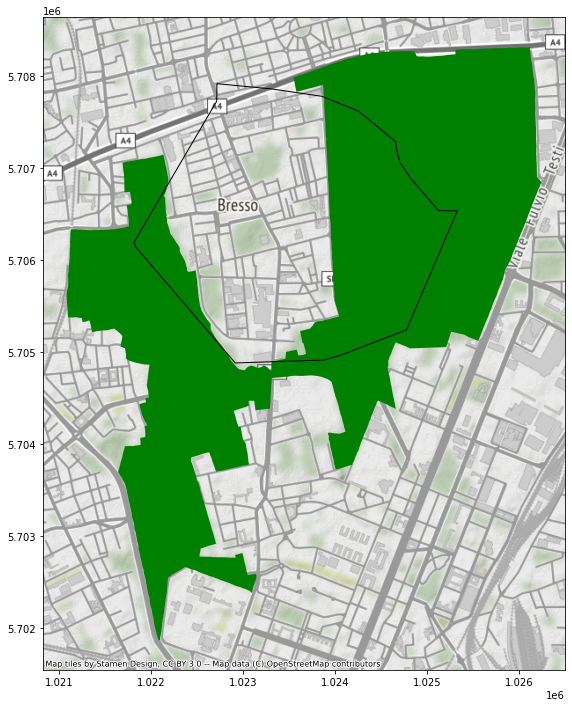

In [ ]:
nome_comune = input("inserire un comune: ")
comune_selezionato = comuni3857[comuni3857["COMUNE"] == nome_comune].geometry.item()
parchi_comune = parchi_regionali3857[parchi_regionali3857.intersects(comune_selezionato)]
comune_selezionato2 = gdp.GeoSeries([comune_selezionato])
ax = parchi_comune.plot(figsize = (15, 12),  edgecolor = "none", facecolor = "green")
comune_selezionato2.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

6. dato il nome di una provincia, avere i parchi che ospita (elenco e mappa)

inserire un comune: Como


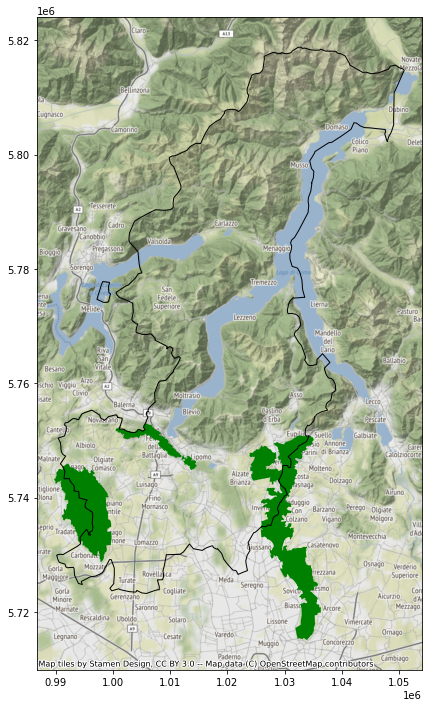

In [ ]:
nome_provincia = input("inserire un comune: ")
provincia_selezionato = province3857[province3857["DEN_UTS"] == nome_provincia].geometry.item()
parchi_provincia = parchi_regionali3857[parchi_regionali3857.intersects(provincia_selezionato)]
provincia_selezionato2 = gdp.GeoSeries([provincia_selezionato])
ax = parchi_provincia.plot(figsize = (15, 12),  edgecolor = "none", facecolor = "green")
provincia_selezionato2.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)